<a href="https://colab.research.google.com/github/JaNiAr2/Week3/blob/main/Copy_of_NLTK_Workshop_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗣️ Session 3 — Text Analysis with NLTK (Beginner‑Friendly Colab)
**Python for Public Policy**

This workbook introduces Natural Language Processing (NLP) using **NLTK** on a small, policy‑relevant corpus (U.S. Inaugural Addresses). It’s written for beginners: before each code block you’ll see a plain‑English explanation of what the code does and why we’re doing it.

## 0) Setup — make sure NLTK is up to date (and download only what we need)
**Why:** Colab sometimes has an older NLTK version. We upgrade it first, then fetch a *small* set of resources so everything runs quickly in class.

In [ ]:
# We upgrade NLTK to the latest version so functions and data work as expected.
!pip -q install -U nltk

# Now we import nltk and download only the small packages we need for this session.
import nltk
needed = ["punkt_tab",           # tokenizer (splits text into words)
          "stopwords",       # list of common words to remove (the, and, is, ...)
          "wordnet",         # lexical database used for lemmatization (getting word roots)
          "averaged_perceptron_tagger_eng",  # part-of-speech tagger (N/V/Adj/Adv)
          "inaugural"]       # a small corpus of U.S. inaugural addresses
for pkg in needed:
    nltk.download(pkg, quiet=True) # no status text printed - just downloads

print("NLTK version:", nltk.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.4 MB/s eta 0:00:00
NLTK version: 3.9.2


## 1) Load a small, policy‑relevant corpus (Inaugural Addresses)
**Why:** This corpus is tiny (fast to run) and on‑topic for public policy. We’ll list the available speeches and pick one.

In [ ]:
# Import the inaugural corpus and preview what's available.
from nltk.corpus import inaugural
fileids = inaugural.fileids() # list of all the file identifiers (basically filenames) inside the corpus
print(f"Speeches available: {len(fileids)}")
fileids[:20]  # first few file names (e.g., '1961-Kennedy.txt')

Speeches available: 60


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt']

### Concordance, similar, dispersion
### Quick Text Analysis Tools in NLTK

**What these do:**  
- **`concordance("word")`** → shows where a word appears in the text, with a few words before and after.  
- **`similar("word")`** → finds other words that show up in *similar contexts*, revealing associations.  
- **`dispersion_plot([...])`** → shows where words appear across a text or series of texts, almost like a timeline.  

**Why this matters for policy work:**  
These tools are simple but powerful ways to explore how language is used in politics and policy:  

- **Concordance (word-in-context):** Helps you check how an issue is framed.  
  *Example:* Looking at every use of “immigration” in congressional speeches might show whether it’s discussed mainly as an *economic issue* (“immigration and jobs”), a *security issue* (“immigration and border”), or a *humanitarian issue* (“immigration and dignity”).  

- **Similar (word associations):** Reveals themes tied together in political rhetoric.  
  *Example:* Searching `.similar("economy")` in presidential speeches might bring up “jobs,” “growth,” or “markets,” showing which ideas are consistently linked with the economy.  

- **Dispersion plot (word trends):** Lets you visualize when an issue rises or falls in importance.  
  *Example:* Tracking “climate,” “terrorism,” and “inflation” across inaugural addresses could highlight how priorities shift over time — evidence for agenda-setting or changing public concerns.  

👉 These tools give you quick, interpretable evidence that you can connect directly to policy debates. They turn messy text into insights about how issues are framed, which themes dominate, and how agendas evolve.  

---

**Optional Exercise:**  
Pick one policy-relevant term (e.g., `"economy"`, `"war"`, `"climate"`) and:  
1. Run at least one of the tools above.  
2. Write a one-sentence takeaway in plain English (e.g., “In the inaugural speeches, ‘climate’ shows up only recently, suggesting it’s a newer policy priority.”).


NOTES:

Analyzing: 2009-Obama.txt

The word 'economy' appears in these sentences:

Displaying 3 of 3 matches:
k of violence and hatred . our economy is badly weakened , a conseque
 to be done . the state of our economy calls for action , bold and sw
rosperous . the success of our economy has always depended not just o

The word 'economy' is used in similar contexts as:

nation spirit journey government

Now plotting keyword positions across the speech...



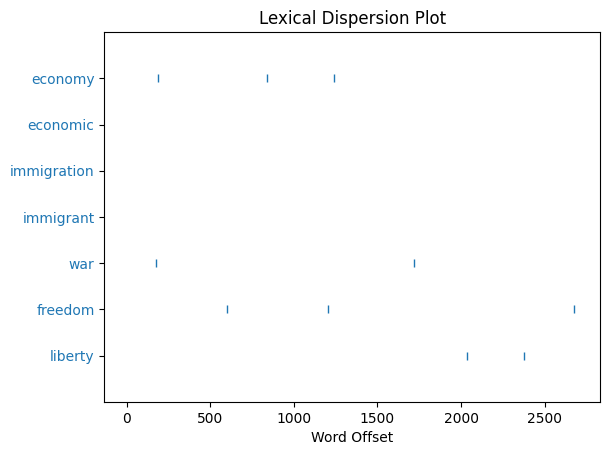

In [ ]:
from nltk.tokenize import word_tokenize  # Splitting text into smaller units (tokens = words, punctuation, letters)
from nltk.text import Text  # Turns a pile of words into a "smart list" you can search

# Choose a speech
s1 = fileids[-5]  # pick a specific fileid
#bring the entire text from fifth from end of the list (Obama 2009)
raw = inaugural.raw(s1)

# Lowercase all tokens so 'Economy' == 'economy'
tokens = [w.lower() for w in word_tokenize(raw)]
T = Text(tokens)

print("Analyzing:", s1)

# --- Concordance search ---
search_term = "economy"
print(f"\nThe word '{search_term}' appears in these sentences:\n")
T.concordance(search_term, width=70, lines=12)

# --- Similar words ---
print(f"\nThe word '{search_term}' is used in similar contexts as:\n")
T.similar(search_term)

# --- Dispersion plot ---
print("\nNow plotting keyword positions across the speech...\n")
T.dispersion_plot(["economy", "economic", "immigration", "immigrant", "war", "freedom", "liberty"])


## Combining `similar()` with dispersion plot

words people ideals midst part indicators face spirit promise
greatness


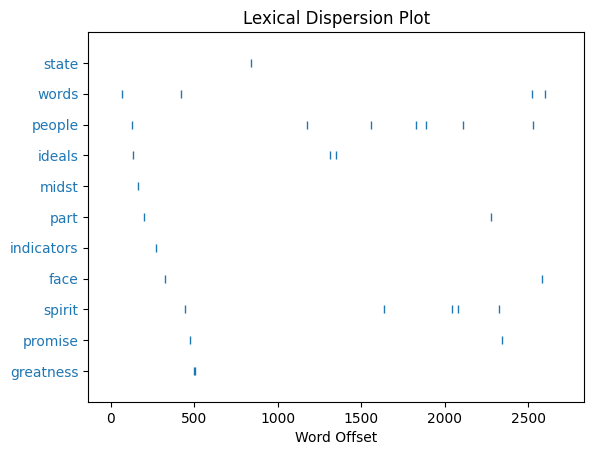

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

raw = inaugural.raw(s1)  # example
tokens = [w.lower() for w in word_tokenize(raw)]
T = Text(tokens)

keyword = "state"

# Step 1: Get similar words programmatically
similar_words = T.similar(keyword, num=10)  # <- prints, but doesn’t return

# Trick: we can rerun it with a workaround
from io import StringIO
import sys

# Redirect stdout to capture the printed output
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
T.similar(keyword, num=10)
sys.stdout = old_stdout

# Step 2: clean captured output into a list
similar_list = mystdout.getvalue().split()

# Step 3: combine with original keyword(s)
all_terms = [keyword] + similar_list

# Step 4: plot them
T.dispersion_plot(all_terms)


### 2) A fast, reusable preprocessing pipeline  

**Goal:** Take messy, raw text (like a speech, policy report, or set of news articles) and turn it into a clean list of meaningful words we can actually count, compare, and analyze.  

**Steps:**  
1. **Tokenize & normalize** → split text into individual words, make everything lowercase, and keep only letters/numbers.  
   *Why it matters:* Ensures consistency so “Policy,” “policy,” and “POLICY” are all treated as the same word.  

2. **Remove stopwords** → drop very common filler words like *the, and, of*.  
   *Why it matters:* These words don’t add meaning to policy analysis — removing them lets us see the actual issues and themes (e.g., “immigration,” “education,” “climate”).  

3. **POS-tag once** → label each word as Noun, Verb, Adjective, or Adverb.  
   *Why it matters:* Helps us understand the *role* of a word. Example: “run” as a *verb* (to run a program) vs. “run” as a *noun* (an election run). This distinction matters in political texts.  

4. **Lemmatize** → reduce words to their base form (e.g., “policies” → “policy,” “running” → “run”).  
   *Why it matters:* Lets us group variations of the same concept together. For example, “migrants,” “migration,” and “migratory” can all be normalized for cleaner analysis.  

👉 **Why this pipeline matters for public policy :**  
Think of it as turning noisy political language into *structured evidence*. With preprocessing, you can:  
- Compare how often “immigration” appears in one president’s speeches vs. another’s.  
- Track whether economic terms (e.g., “jobs,” “growth,” “markets”) spike after a recession.  
- Map the framing of an issue — are words like “freedom” or “security” clustered around “war”?  

**Efficiency tip:** We tag the whole text once (instead of tagging inside a loop). This speeds things up and avoids redundant work, which is crucial when working with large policy datasets.  


### Key Libraries for Text Preprocessing (Policy Applications)

| Import | What It Does | Policy Example |
|--------|--------------|----------------|
| `import re` | Python’s **regular expressions** for finding text patterns. | Extract all years (e.g., 1990–2025) from legislation or reports. |
| `stopwords` (from `nltk.corpus`) | Pre-built list of common filler words (*the, and, of*). | Remove noise so you can focus on terms like *climate*, *jobs*, *security*. |
| `wordnet` (from `nltk.corpus`) | Large lexical database grouping words into synonym sets (*synsets*). | Link words like *immigrant* and *migrant* to analyze debates more accurately. |
| `WordNetLemmatizer` (from `nltk.stem`) | Reduces words to their **base form**. | Treat *policies*, *policy*, and *policy-making* as connected. |
| `pos_tag` (from `nltk`) | Tags each word as noun, verb, adjective, or adverb. | Distinguish *tax* as a **noun** (“raise a tax”) vs. **verb** (“to tax citizens”). |
| `FreqDist` (from `nltk`) | Counts word frequencies and creates quick plots. | See which terms dominate an inaugural address (*freedom* vs. *security*). |


In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

# 1) Tokenize & normalize (safer)
def tokenize_norm(text):
    tok = RegexpTokenizer(r"[A-Za-z0-9]+")  # keeps alphanumeric runs, drops punctuation
    return [t.lower() for t in tok.tokenize(text)]

# 2) Remove stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

# 3–4) POS-tag once, then lemmatize
def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

def run_pipeline(text):
    toks = tokenize_norm(text)
    toks_nostop = remove_stopwords(toks)
    clean = pos_lemmatize(toks_nostop)
    return toks, toks_nostop, clean

# --- Sanity test on an inaugural speech ---
from nltk.corpus import inaugural
s1 = inaugural.fileids()[-1]
raw = inaugural.raw(s1)

toks, toks_nostop, clean = run_pipeline(raw)
print("Speech:", s1)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))
print("Top 10 (clean):", FreqDist(clean).most_common(10))


Speech: 2025-Trump.txt
Counts -> toks: 2938 | no-stop: 1422 | clean: 1422
Top 10 (clean): [('thank', 22), ('america', 21), ('nation', 20), ('american', 19), ('country', 17), ('great', 16), ('government', 11), ('state', 10), ('world', 10), ('today', 10)]


In [ ]:
pos_lemmatize(['worst'])

['bad']

### Run the pipeline on one speech & get a quick report
**What you’ll see:**
- Token counts before/after stopword removal
- Number of unique cleaned tokens
- Top 20 most frequent meaningful tokens

In [ ]:
# Choose a speech
s1 = fileids[-5]  # pick a specific fileid
raw = inaugural.raw(s1)

toks, toks_nostop, clean = run_pipeline(raw) #Take my raw text, send it through the pipeline, and give me back three versions (toks, toks_nostop, clean)
print("Speech:", s1)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))

fdist = FreqDist(clean)
print("\nTop 10 most common words (clean):\n")

for word, count in fdist.most_common(10):
    print(f"{word:>10}   {count}")


Speech: 2009-Obama.txt
Counts -> toks: 2412 | no-stop: 1166 | clean: 1166

Top 10 most common words (clean):

         u   23
    nation   15
       new   11
   america   10
     every   8
    people   8
      must   8
generation   8
      work   8
      less   7


### Lexical diversity on a fixed slice (for fair comparisons)

**Why fixed slice?** Longer texts naturally introduce more unique words just because there’s more material. To compare fairly, we look at the first *N* tokens of each text (e.g., 2,000).  

**Why it matters for policy analysis:** Lexical diversity is a proxy for **how wide a speaker’s or author’s vocabulary is in a given setting**. In a policy context, this can reveal patterns such as:  
- **Complexity vs. accessibility:** A President with low lexical diversity in an inaugural address might be aiming for broad, clear communication. Higher diversity could suggest more technical, elite-oriented language.  
- **Shifts over time:** Comparing lexical diversity across decades of Congressional debates can show whether policymaking language is becoming more repetitive (sound-bite driven) or more nuanced.  
- **Different audiences:** A think tank’s report to policymakers may have higher diversity than its press release, signaling a difference in how ideas are framed for experts vs. the public.  
- **Equity and inclusion:** Lexical diversity in speeches about social policy could indicate whether a wide range of concepts and stakeholders are being represented—or whether the discourse is narrow.  


In [ ]:
def lexical_diversity(tokens, n=2000):
    # Use first n tokens (or all if shorter). Higher = more variety of vocabulary.
    slice_ = tokens[:n] if len(tokens) >= n else tokens
    return len(set(slice_)) / max(1, len(slice_))

lexical_diversity(clean, n=2000)

0.6217838765008576

## 3) Policy mini‑comparison — pick TWO speeches
**Task:** Compare two inaugural addresses on:
1) Top terms (lemmatized)
2) Lexical diversity on a fixed slice (e.g., 2,000 tokens)
3) (Next cells) Simple charts & keyword dispersion

In [ ]:
# You can change these IDs. Use 'fileids' printed earlier to choose.
s1, s2 = fileids[1], fileids[-4]
raw1, raw2 = inaugural.raw(s1), inaugural.raw(s2)

# Clean tokens for both speeches.
c1 = run_pipeline(raw1)[2]
c2 = run_pipeline(raw2)[2]

# Frequency distributions (counts of words)
fd1, fd2 = FreqDist(c1), FreqDist(c2)
top1 = fd1.most_common(25)
top2 = fd2.most_common(25)

print(f"\nTop terms — {s1}")
for word, count in top1[:10]:
    print(f"{word:>10}   {count}")

print(f"\nTop terms — {s2}")
for word, count in top2[:10]:
    print(f"{word:>10}   {count}")

print("\nLexical diversity (slice 2000):")
print(f"{s1:>15}   {lexical_diversity(c1, 2000):.4f}")
print(f"{s2:>15}   {lexical_diversity(c2, 2000):.4f}")



Top terms — 1793-Washington.txt
     shall   3
      oath   2
    fellow   1
   citizen   1
      call   1
      upon   1
     voice   1
   country   1
   execute   1
  function   1

Top terms — 2013-Obama.txt
         u   21
      must   17
      make   12
      time   11
    people   11
  american   10
   citizen   8
    nation   8
   require   8
   america   8

Lexical diversity (slice 2000):
1793-Washington.txt   0.9500
 2013-Obama.txt   0.6038


### Visualize top terms (bar charts)
**Tip:** Keep labels small (k=15) so the chart is readable.

In [ ]:
import plotly.express as px
import pandas as pd

def plot_top_plotly(fd, title, k=15):
    # Get top-k words and counts
    data = fd.most_common(k)
    df = pd.DataFrame(data, columns=["word", "count"])

    # Interactive bar chart
    fig = px.bar(
        df,
        x="word",
        y="count",
        title=title,
        labels={"word": "Word", "count": "Frequency"},
    )

    # Rotate x labels for readability
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

# Use for both speeches
plot_top_plotly(fd1, f"Top terms — {s1}")
plot_top_plotly(fd2, f"Top terms — {s2}")


### Compare keyword positions (dispersion) across both speeches  

**Why:** A dispersion plot shows where a keyword appears across the length of a text (beginning, middle, or end).  

**Why it matters for policy analysis:**  
- **Agenda-setting:** If terms like *“economy”* or *“security”* cluster at the start of an address, it signals that these issues are being foregrounded as top priorities.  
- **Framing over time:** A keyword like *“immigration”* appearing only in the middle or end may suggest it is treated as secondary or framed as part of a larger argument, not as a headline policy priority.  
- **Comparative rhetoric:** Comparing dispersion across two leaders (e.g., one president vs. another) can highlight differences in emphasis. One may return repeatedly to *“freedom”* throughout, while another only mentions it once at the conclusion.  
- **Narrative structure:** Dispersion helps uncover how policy issues are woven into a speech’s arc—whether they’re central threads that recur or single-mention talking points.  
- **Strategic communication:** Policymakers often place sensitive topics (e.g., *“war”* or *“climate”*) at specific points—either early to show urgency or late to downplay conflict. Dispersion reveals these choices.  


1793-Washington.txt
2013-Obama.txt


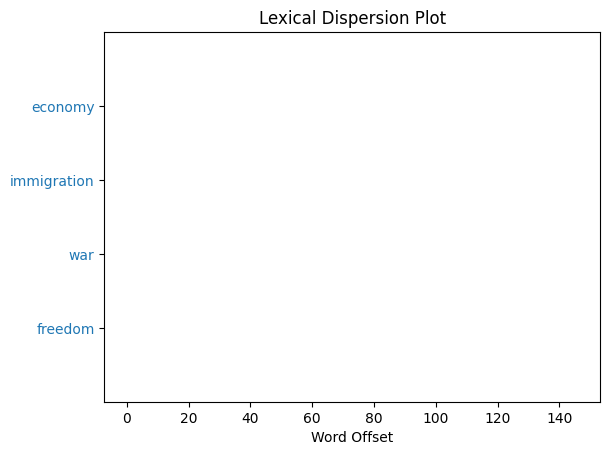

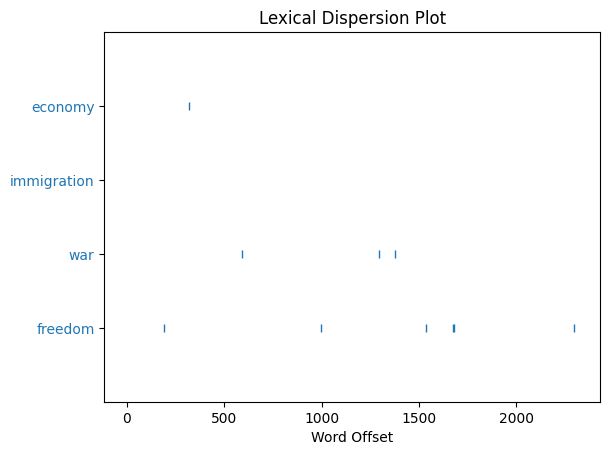

In [ ]:
terms = ["economy", "immigration", "war", "freedom"]
from nltk.text import Text
T1 = Text(nltk.word_tokenize(raw1))
T2 = Text(nltk.word_tokenize(raw2))
print(s1)
T1.dispersion_plot(terms)
print(s2)
T2.dispersion_plot(terms)

## 4) Collocations (common policy phrases)   

**What:** Frequently co-occurring word pairs (bigrams) ranked by PMI (Pointwise Mutual Information).  
**Why:** Phrases (e.g., *national security*) carry more meaning than single words.  

**Why it matters for policy analysis:**  
- **Policy framing:** Collocations highlight the exact phrases that shape how an issue is communicated, such as *“climate change”* vs. *“global warming”*.  
- **Agenda clustering:** Seeing which words travel together (e.g., *“tax reform”*, *“border security”*) shows how topics are bundled in political discourse.  
- **Comparative analysis:** Different actors may use distinct collocations around the same theme (e.g., *“economic growth”* vs. *“job creation”*), revealing ideological leanings.  
- **Emerging narratives:** Collocations can uncover new or rising phrases in public debate, such as when *“artificial intelligence”* began appearing alongside *“national competitiveness”*.  
- **Precision over frequency:** Unlike raw word counts, collocations filter out generic terms (*“good policy”*) and point to phrases with policy weight.  


In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

def top_bigrams(tokens, min_freq=3, k=15):
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(min_freq)  # ignore very rare pairs
    return finder.nbest(BigramAssocMeasures().pmi, k)

top_bigrams(c1, min_freq=2, k=15)

[('health', 'care'),
 ('common', 'object'),
 ('defined', 'common'),
 ('still', 'disagree'),
 ('united', 'state'),
 ('silent', 'prayer'),
 ('dignity', 'respect'),
 ('sacred', 'oath'),
 ('give', 'best'),
 ('racial', 'justice'),
 ('whole', 'soul'),
 ('well', 'believe'),
 ('civil', 'war'),
 ('vice', 'president'),
 ('object', 'love')]

## 5) VADER sentiment for short political text  

**When to use:** Best for very short statements like tweets, headlines, press releases, or soundbites.  

**Why it matters for policy analysis:**  
- **Media monitoring:** Helps track whether news headlines frame a policy initiative positively (*“landmark reform”*) or negatively (*“controversial overhaul”*).  
- **Public opinion:** Useful for analyzing large batches of social media posts about a policy (e.g., reactions to immigration reform) to gauge the emotional temperature of debate.  
- **Political rhetoric:** Sentiment scores can show how different politicians frame the same issue—one may describe healthcare with positive sentiment (*“affordable care”*), another with negative (*“broken system”*).  
- **Rapid response:** In campaign or policy comms, quick sentiment checks can help staffers spot spikes in negativity that might require counter-messaging.  
- **Limitations:** VADER is designed for short, informal text and may miss nuance in long, formal speeches. But for high-volume, short-form content, it’s a powerful first step.  


In [ ]:
nltk.download("vader_lexicon", quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

examples = [
    "This bill is a disaster.",
    "Today we achieved historic progress.",
    "We will work together to secure a fair economy."
]
[sia.polarity_scores(x) for x in examples]

[{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.5719}]

## 6) Bring your own text  — Google Drive
**Tip:** Keep files small (~1–2 MB). Update the path below to your `.txt` file.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

filepath = "/content/gdrive/MyDrive/path/to/your_text.txt"  # ← change this
try:
    raw = open(filepath, encoding='utf-8').read()
    toks, toks_nostop, clean_local = run_pipeline(raw)
    print("Tokens:", len(toks), "Unique(clean):", len(set(clean_local)))
    FreqDist(clean_local).most_common(20)
except FileNotFoundError:
    print("Update 'filepath' above to your file in Drive.")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Update 'filepath' above to your file in Drive.
